# Feature Engieering
![](https://editor.analyticsvidhya.com/uploads/41951FEATURE%20SCALING%20IN%20PYTHON.png)

` Feature Engieering `
Feature engieerng is the process odusing domiain knowledge to extract features from raw data
this feature can be used to improve the performace of machine learning alogorithm .

![standardization inputation](https://miro.medium.com/v2/resize:fit:1400/1*sopItiVC6VJnR-qmyKMFyw.jpeg)

Feature Transformation is the first step of the feature engieering .

Creating manually feature is know as __`feature Constrcution`__ 

### Feature Engieering 
__what is feature scaling ?__

Feature Scaling is technique to standardize  the independent Features present in the data in the fixed range

__types of feature engieering__
1. Standardization 
2. Normalization 

- Standardization also as __Z-score Normalization__

standardization formula 


![image](https://miro.medium.com/v2/resize:fit:1108/1*vWy_ILdhiKKOO96zAP7gcQ@2x.jpeg)

After standardization all values or specific column there will be  
mean or M  =0 
and Standard deviation = 1

__standardization intution__




![standardization inputation](https://i.stack.imgur.com/WqU1U.png)

### standardization example ->

In [43]:
import pandas as pd # data processing 
import numpy as np  # linear algebra 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [13]:
df=pd.read_csv("Social_Network_Ads-Copy1.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
df=df.iloc[:,2:]

In [16]:
df.sample(5)

,Age,EstimatedSalary,Purchased
14,18,82000,0
116,35,75000,0
288,41,79000,0
11,26,52000,0
0,19,19000,0


# train test split

In [17]:
from sklearn.model_selection import train_test_split 

In [21]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased', axis=1),
                                               df['Purchased'],
                                              test_size=0.3,
                                              random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
# fit the scaler to the train set , it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [25]:
# transform the train and test
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [31]:
# after transforming X_train_scaled and X_test_scaled are in numpy array format 
# X_train_scaled 
# X_test_scaled

In [32]:
# creating the dataframe 
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [33]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [34]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [35]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


After standardization scaling ,you can see 
mean = 0 
std = 1

# effect of Scaling 

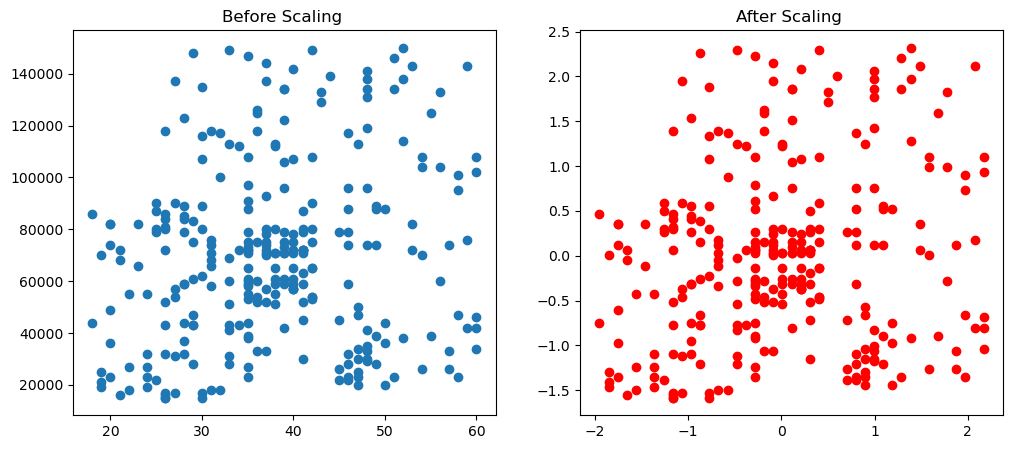

In [41]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling ')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling ")
plt.show()

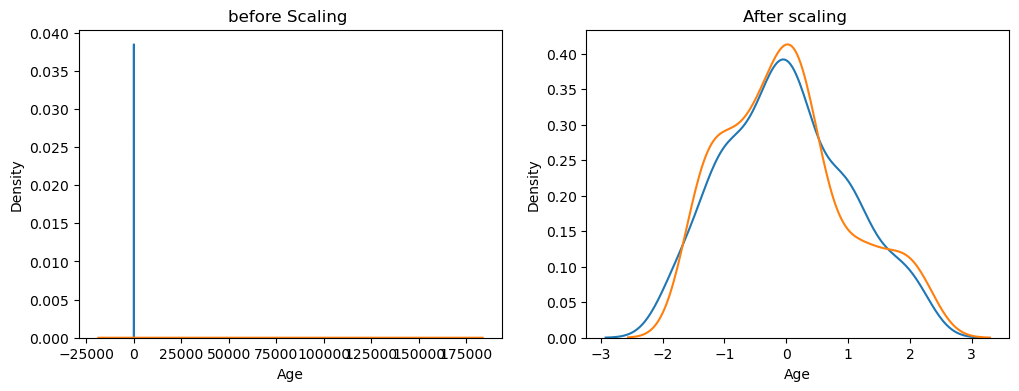

In [44]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))
#before Scaling 
ax1.set_title("before Scaling ")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# After scaling 
ax2.set_title("After scaling ")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

# Comparision Of Distributions

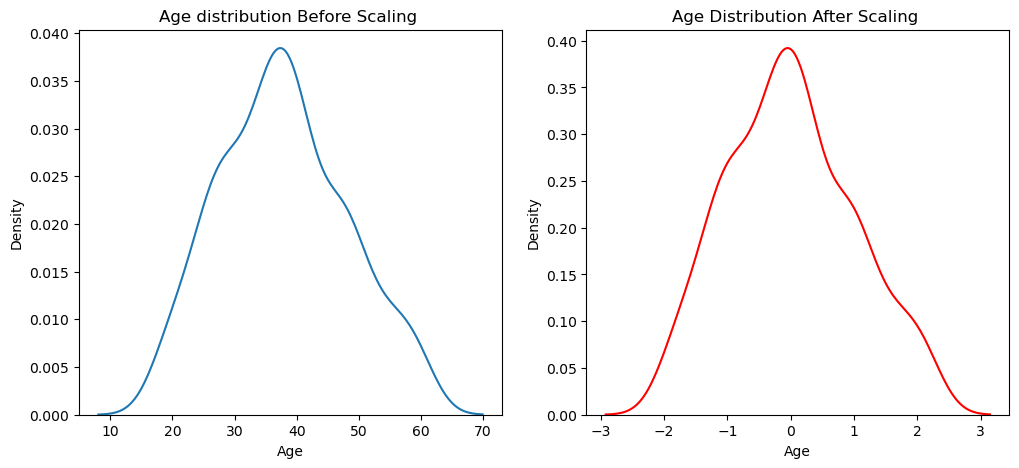

In [46]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# before scaling 
ax1.set_title("Age distribution Before Scaling ")
sns.kdeplot(X_train['Age'],ax=ax1)

# After Scaling 
ax2.set_title("Age Distribution After Scaling ")
sns.kdeplot(X_train_scaled['Age'],ax=ax2,color='red')

plt.show()

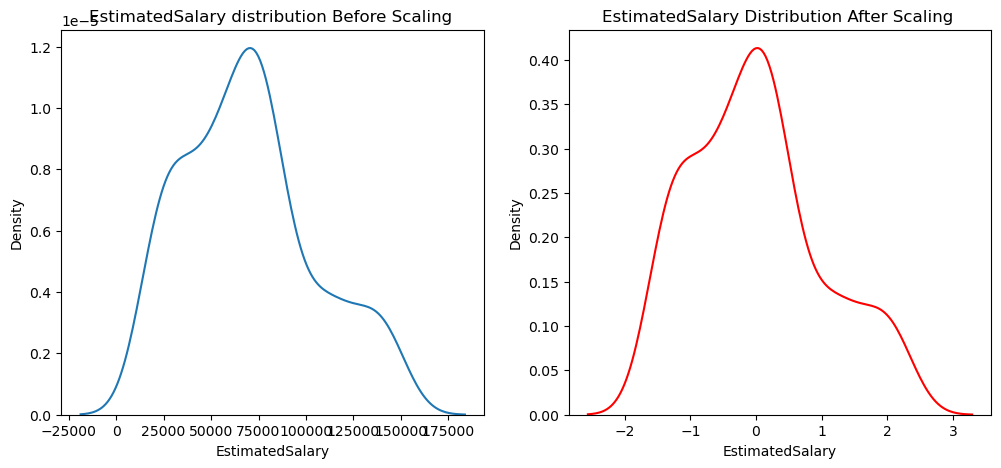

In [47]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# before scaling 
ax1.set_title("EstimatedSalary distribution Before Scaling ")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# After Scaling 
ax2.set_title("EstimatedSalary Distribution After Scaling ")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2,color='red')

plt.show()

# Why scaling is important ?

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr=LogisticRegression()

In [50]:
lr_scaled=LogisticRegression()

In [51]:
lr.fit(X_train,y_train) #Unscaled data 
lr_scaled.fit(X_train_scaled,y_train) # scaled data 


LogisticRegression()

In [52]:
y_pred= lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [53]:
from sklearn.metrics import accuracy_score


In [56]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()


In [59]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [61]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [62]:
print("Actual ",accuracy_score(y_test,y_pred))
print("Scaled ",accuracy_score(y_test,y_pred_scaled))

Actual  0.875
Scaled  0.875


In [63]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


__When to use standardization__

![](https://miro.medium.com/max/1400/1*qRmiffZgkNaXnTBZwDafCA.png)